# Logistic Regression

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [11]:
df = pd.read_csv('./Occupancy_Estimation.csv')
df["Room_Occupancy_Count"] = [1 if value else 0 for value in df["Room_Occupancy_Count"]]
feature_data = df.drop(columns=["Room_Occupancy_Count", "Date", "Time"])
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, df["Room_Occupancy_Count"], test_size=0.2)
LogReg = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, Y_train)
LogReg.coef_

array([[-0.3318504 , -0.04652575,  3.87539884, -3.51390122,  0.16040229,
         0.00420503,  0.20518245, -0.31197467, -0.03789297,  1.00126434,
        -0.18155096, -0.16492851, -0.00951005,  3.16973847,  0.76704206,
         3.26203237]])

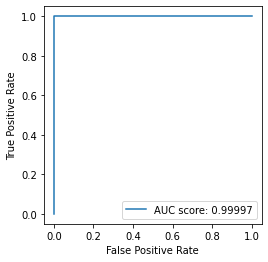

In [18]:

scores = LogReg.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(Y_train, scores[:,1])

auc = roc_auc_score(Y_train, scores[:,1])


plt.plot(fpr, tpr,)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC score: " + str(round(auc, 5))], loc="best")
plt.show()

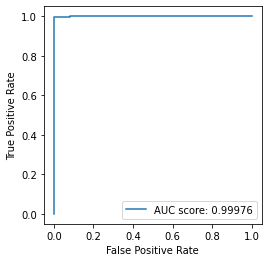

In [25]:

scores = LogReg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, scores[:,1])

auc = roc_auc_score(Y_test, scores[:,1])


plt.plot(fpr, tpr,)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC score: " + str(round(auc, 5))], loc="best")
plt.show()